In [1]:
import pandas as pd
descriptors = pd.read_excel("../data/Descriptors.xls")
descriptors.head(20)

,Descriptor type,Number,Descriptor,Class,Reference
0,Acidic group count,1,nAcid,2D,NaN
1,ALOGP,3,"ALogP, ALogp2, AMR",2D,"Ghose, A.K. and Crippen, G.M. , Atomic physico..."
2,APol,1,apol,2D,NaN
3,Aromatic atoms count,1,naAromAtom,2D,NaN
4,Aromatic bonds count,1,nAromBond,2D,NaN
5,Atom count,14,"nAtom, nHeavyAtom, nH, nB, nC, nN, nO, nS, nP,...",2D,NaN
6,Autocorrelation,346,"ATS0m, ATS1m, ATS2m, ATS3m, ATS4m, ATS5m, ATS6...",2D,"Todeschini, R. and Consonni, V. (2009). Molecu..."
7,Barysz matrix,91,"SpAbs_DzZ, SpMax_DzZ, SpDiam_DzZ, SpAD_DzZ, Sp...",2D,"Todeschini, R. and Consonni, V. (2009). Molecu..."
8,Basic group count,1,nBase,2D,NaN
9,BCUT,6,"BCUTw-1l, BCUTw-1h, BCUTc-1l, BCUTc-1h, BCUTp-...",2D,"Pearlman, R.S. and Smith, K.M., Metric Validat..."


In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [4]:
data_smiles = pd.read_csv("../data/smiles.csv")
data_cal_des = pd.read_csv("../data/Calculated_descriptors.csv")
data_cal_des.head(10)

,Unnamed: 0,smile_ID,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,0,1.8674,3.487183,134.2482,61.657102,23,23,44,...,0.844559,0.143400,0.576319,0.397215,0.359925,38.197213,194.058561,313.526691,0.766839,1.333459
1,1,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,0,2.5212,6.356449,136.2083,62.914895,22,22,48,...,0.703605,0.273316,0.651215,0.490695,0.445324,34.140103,250.421523,461.173977,0.555407,1.587235
2,2,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,0,3.4635,11.995832,148.8825,70.371067,22,22,51,...,0.760510,0.177701,0.505675,0.446498,0.346187,31.942735,197.041832,501.140741,0.640766,1.298360
3,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,0,3.4635,11.995832,148.8825,70.371067,22,22,51,...,0.834081,0.115310,0.515730,0.349506,0.368112,34.145644,168.156090,396.080916,0.751122,1.233349
4,4,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,0,0.4261,0.181561,128.1008,59.957102,22,22,43,...,0.839833,0.100089,0.560831,0.371489,0.360291,35.016049,172.302879,424.136183,0.759750,1.292610
5,5,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,0,1.0280,1.056784,124.4453,58.045895,23,23,44,...,0.787660,0.196690,0.542686,0.385700,0.336432,27.467091,128.503665,206.212240,0.681491,1.264818
6,6,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,0,2.9999,8.999400,135.3784,62.323309,23,23,47,...,0.875613,0.090029,0.610691,0.462625,0.426142,36.875207,152.307059,324.993257,0.813419,1.499458
7,7,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,0,1.3967,1.950771,129.1615,59.559102,23,23,44,...,0.906318,0.053602,0.581766,0.368601,0.385654,37.322928,121.265901,259.819342,0.859478,1.336021
8,8,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,0,1.4397,2.072736,95.9646,47.763895,12,12,37,...,0.857907,0.119314,0.593846,0.333083,0.364304,25.849906,83.273791,149.400257,0.786860,1.291233
9,9,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,0,-0.1851,0.034262,125.1950,61.845481,12,12,49,...,0.762199,0.220529,0.626956,0.520836,0.370667,28.896806,154.530584,253.482224,0.643298,1.518459


In [6]:
des_class = list(descriptors["Descriptor"])
subset = des_class[5].split(", ")
subset

['nAtom',
 'nHeavyAtom',
 'nH',
 'nB',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX']

In [14]:
data = data_cal_des[subset]
data.head(5)

,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX
0,44,30,14,0,21,4,1,2,0,0.0,2.0,0.0,0.0,2.0
1,48,33,15,0,21,5,1,2,0,3.0,1.0,0.0,0.0,4.0
2,51,32,19,0,22,4,1,4,0,0.0,1.0,0.0,0.0,1.0
3,51,32,19,0,22,4,1,4,0,0.0,1.0,0.0,0.0,1.0
4,43,29,14,0,19,5,1,3,0,0.0,1.0,0.0,0.0,1.0


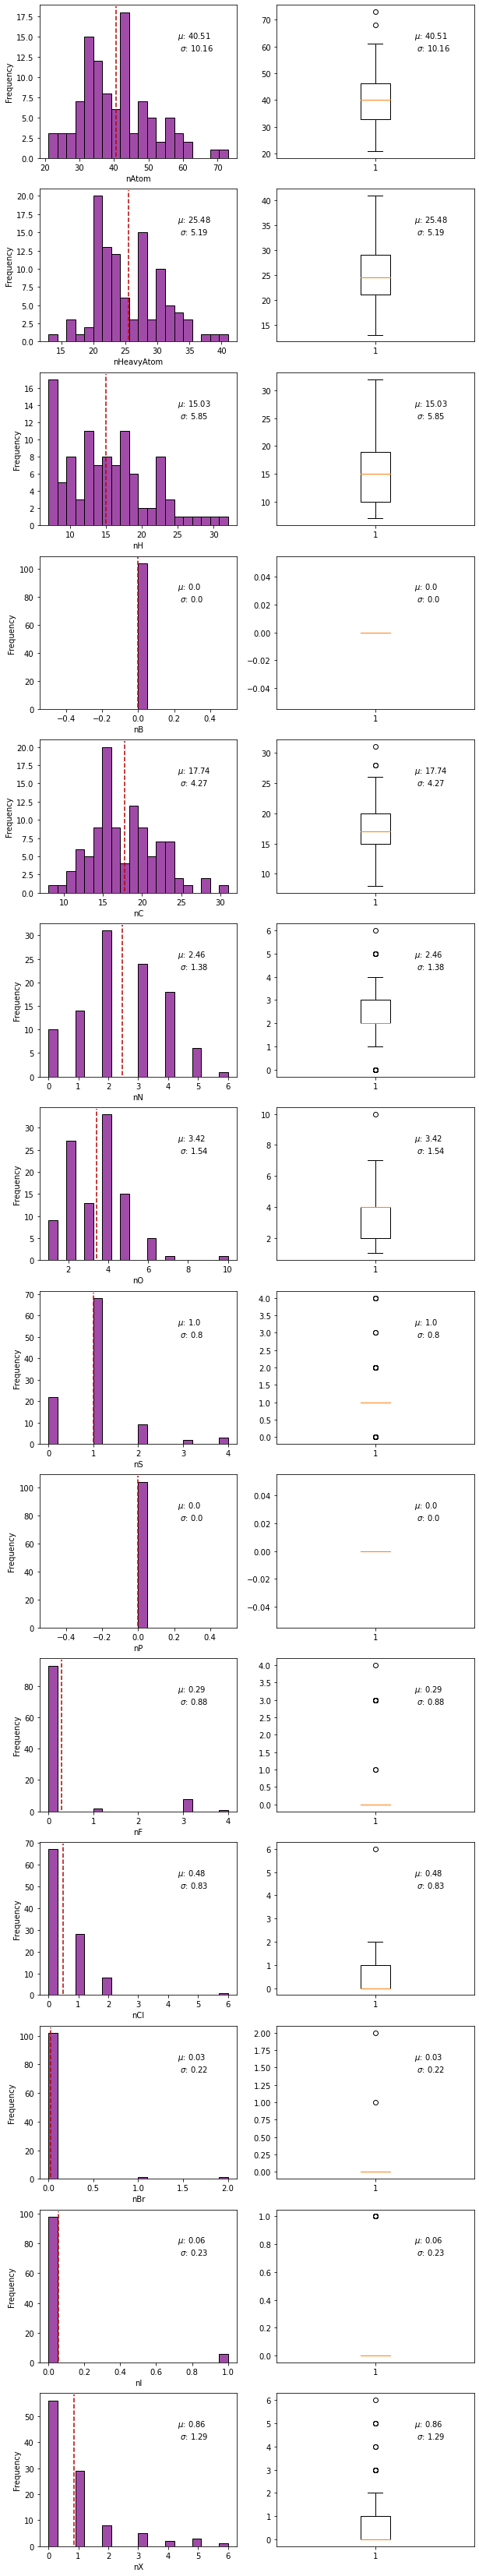

In [26]:
fig = plt.figure(figsize=(10,60))

gs = fig.add_gridspec(14,2)

for i in range(14):
    
    ax1 = fig.add_subplot(gs[i,0])
    x = data[[subset[i]]].values
    nbins = 20
    ax1.hist(x= x, bins= nbins, color = '#A14BA9', edgecolor = '#000000')

    ax1.set_xlabel(xlabel = '{}'.format(subset[i]))
    ax1.set_ylabel(ylabel = 'Frequency')
    ax1.axvline(x = np.mean(x),ymin = 0.01, ymax = 0.99, linestyle = '--', color = '#B60000')
    ax1.text(x= 0.7 , y= 0.7 ,
         s = '$\mu$: {} \n $\sigma$: {}'.format(np.round(np.mean(x), 2),np.round(np.std(x), 2)),
         transform = ax1.transAxes)
    
    ax2 = fig.add_subplot(gs[i,1])
    x = data[[subset[i]]].values
    ax2.boxplot(x = x)
    ax2.text(x= 0.7 , y= 0.7 ,
         s = '$\mu$: {} \n $\sigma$: {}'.format(np.round(np.mean(x),2),np.round(np.std(x), 2)),
         transform = ax2.transAxes)